# Custom Data Set
Food101 starting with 3 classes.

It's import to start of with a small scale and scale up when necessary.

Speeds up experimentation time

In [1]:
# Get Data
import requests
import zipfile
from pathlib import Path

# Set up a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists ... skipping")
else:
    print(f"{image_path} directory does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print(f"Downloading pizza, steak, and sushi data...")
    f.write(request.content)

# Unzip the file
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, and sushi data...")
    zip_ref.extractall(image_path)


data/pizza_steak_sushi directory already exists ... skipping
Unzipping pizza, steak, and sushi data...


In [2]:
import os

def walk_through_dir(dir_path):
    """Walks through dir_path returning its contenst"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi


Random image path: data/pizza_steak_sushi/train/sushi/2021381.jpg
Random image class: sushi
Random image height: 512
Random image width: 512


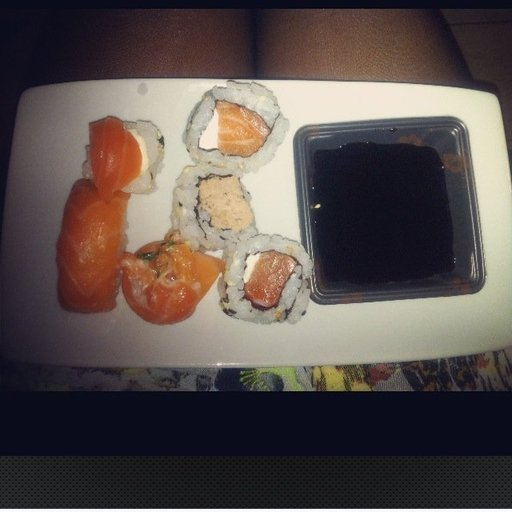

In [3]:
import random
from PIL import Image

#random.seed(2697)

# Set up train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"



# Display a random image
image_path_list = list(image_path.glob("*/*/*.jpg"))
rand_image_path = random.choice(image_path_list)

image_class = rand_image_path.parent.stem

img = Image.open(rand_image_path)
print(f"Random image path: {rand_image_path}")
print(f"Random image class: {image_class}")
print(f"Random image height: {img.height}")
print(f"Random image width: {img.width}")
img

## Transforming the data

Before we can use our image data with PyTorch:
1. Turn your target data into tensors 
2. Turn it into a `torch.utils.data.Dataset` and then subsequently turn this into a `torch.utils.data.DataLoader`, we'll call these dataset and dataloader


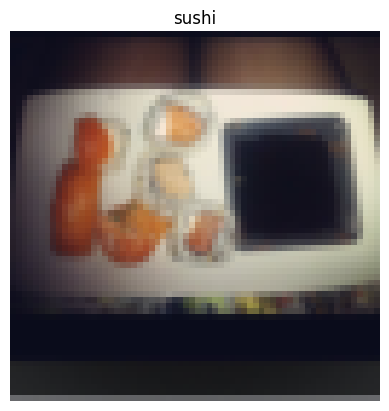

In [4]:
# Let's turn each image into tensors
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

# Create a transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch tensor
    transforms.ToTensor()
])

tensor_img = data_transform(img)
tensor_img_permute = tensor_img.permute(1,2,0)
plt.title(image_class)
plt.axis(False)
plt.imshow(tensor_img_permute);


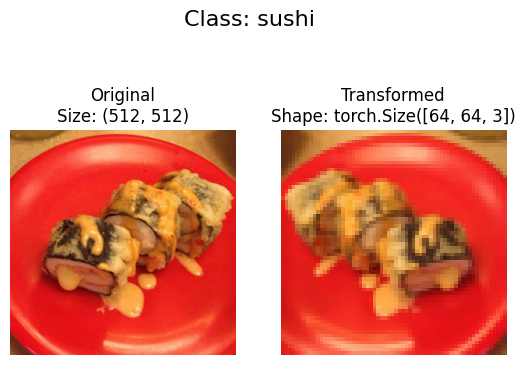

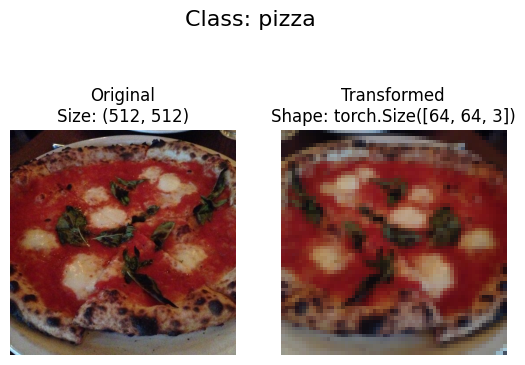

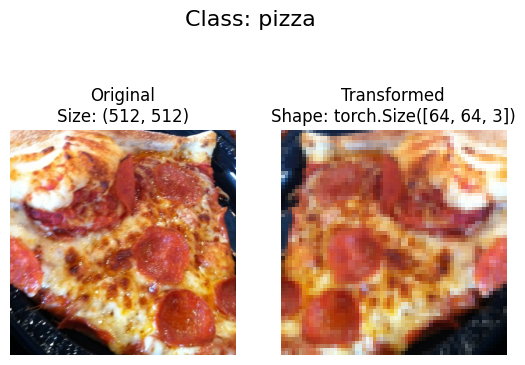

In [5]:
def plot_transformed_images(image_path: list, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    rand_image_paths = random.sample(image_path, k=n)
    for image_path in rand_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            transformed_img = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_img)
            ax[1].set_title(f"Transformed\nShape: {transformed_img.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16);
    
plot_transformed_images(image_path=image_path_list,
                        transform=data_transform,
                        seed=None);

## Loading data to a custom dataset - ImageFolder

We can load image classification data using `torchvision.datasets.ImageFolder`

In [6]:
# Use ImageFolder to create dataset

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform,
                                  target_transform=None)

class_names = train_data.classes

In [7]:
img, label = train_data[0][0], train_data[0][1]
img, class_names[label]

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [8]:
# Turn this into a DataLoader!
BS = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BS,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BS,
                              num_workers=os.cpu_count(),
                              shuffle=False)

len(train_dataloader), len(test_dataloader)

(225, 75)

In [9]:
img, label = next(iter(train_dataloader))

print(f"Image Shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label Shape: {label.shape}")

Image Shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label Shape: torch.Size([1])


### Build a Custom `Dataset`

1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dict from the Dataset

Pros:
* Can create a `Dataset` out of almost anything
* Not limited to PyTorch pre-built `Dataset` functions

Cons:
* Even though you could create `Dataset` at of almost anything, it doesn't mean it will work..
* Using a custom `Dataset` often resulkts in us writing more code, which could be prone to errors or performance errors

In [10]:
# Imports - reimporting just for completeness

import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List # Using typing to hard code types

In [13]:
# Instance of torchvision.datasets.ImageFolder() - we want to recreate this type of functionality
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [32]:
# Creating a helper function to get class names
def find_classes(directory: str) -> Tuple[List[str], Dict[str,int]]:
    class_list = sorted(entry.name for entry in list(os.scandir(directory)) if entry.is_dir())

    if not class_list:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")
    
    class_dict = {entry: idx for idx, entry in enumerate(class_list)}
    
    return (class_list, class_dict)

ret = find_classes(train_dir)
ret


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [40]:
# Fully replicate ImageFolder class
# A custom Dataset class implement three core functions -> __init__, __len__, and __getitem__

class CustomDataset(Dataset):
    """ 
    * Paths - paths of our images
    * Transforms - the transform we'd like to use
    * Classes - a list of the target classes
    * class_to_dx - a dict of the target classes mapped to integer labels

    create a function load_images()
    """
    def __init__(self, directory: str, transform=None, target_transform=None) -> None:
        super().__init__()
        self.paths = list(pathlib.Path(directory).glob("*/*.jpg")) # All the image paths
        self.transform = transform
        self.target_transform = target_transform
        self.classes, self.class_to_idx = find_classes(directory)

    def load_images(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        img = self.load_images(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx
        
        return img, class_idx
    
custom_train_data = CustomDataset("./data/pizza_steak_sushi/train", transform=data_transform)

img, label = custom_train_data[0]

img, label

len(custom_train_data)

225